In [1]:
import sys
sys.path.append('/Users/shiyihe/Desktop/USABILITY_ANALYSIS')   

from duration_processor import load_quiz_data

# load data , rename task name, etc,.
folder = '/Users/shiyihe/Desktop/USABILITY_ANALYSIS/tabular'
all_data = load_quiz_data(folder, ignore_completed=True)

from quiz_evaluator import (
    analyze_nasa_and_post_surveys,
    plot_nasa_tlx_by_format,
    test_post_task_metrics,
    test_nasa_metrics_by_format,
    process_clean_post_tasks,

)

# 假设 all_data 已加载
df_nasa = analyze_nasa_and_post_surveys(all_data)
df_nasa

,participantId,format,startTime,endTime,duration_sec,mental-demand,physical-demand,temporal-demand,performance,effort,frustration
0,6697c8b6d9d7baa7edd8c4d3,hjson,1745933947314,1745933980430,33.116,90.0,20,50.0,55.0,50,75.0
1,67e25388d573ec2d5f1c8442,yaml,1746148170240,1746148206380,36.140,90.0,100,70.0,0.0,95,5.0
2,67e5cf90b79d0874e1cf16b0,toml,1746147492250,1746147510048,17.798,97.0,90,92.0,78.0,99,61.0
3,67d00f24466a67ba7e41228e,toml,1745933364792,1745933382986,18.194,79.0,77,63.0,18.0,98,75.0
4,66475d6f7b27e4443ef0d031,json,1744922061933,1744922093089,31.156,99.0,3,58.0,22.0,67,46.0
...,...,...,...,...,...,...,...,...,...,...,...
97,67ab650c320eccf6141d4010,jsonc,1746147500734,1746147519483,18.749,65.0,61,59.0,57.0,60,62.0
98,65fad673a546ab14baf2f8d3,json5,1745932106163,1745932137658,31.495,85.0,80,85.0,80.0,85,75.0
99,67f1c7bd6f1c4a3d8deae02f,toml,1746146632834,1746146718970,86.136,85.0,60,20.0,10.0,100,10.0
100,67adb27bd5f5776fcb16da62,hjson,1746147510098,1746147559334,49.236,85.0,75,85.0,60.0,80,55.0


In [2]:
res = test_nasa_metrics_by_format(df_nasa)

for metric, info in res.items():
    print(info['interpretation'])
    if info['tukey'] is not None:
        print(info['tukey'].summary())

Metric 'mental-demand': Levene’s test p = 0.173 (homogeneous) variances. ANOVA p = 0.004 (< 0.05): significant differences among formats. See Tukey HSD for pairwise comparisons.
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
 hjson   json  22.3451 0.0011   6.3954 38.2948   True
 hjson  json5  17.1833 0.0562  -0.2545 34.6212  False
 hjson  jsonc  13.7333 0.1652  -2.7072 30.1739  False
 hjson   toml  18.7026 0.0222   1.6414 35.7637   True
 hjson    xml  16.0048 0.0703  -0.7268 32.7363  False
 hjson   yaml  14.3333 0.1297  -2.1072 30.7739  False
  json  json5  -5.1618 0.9691 -22.1376 11.8141  False
  json  jsonc  -8.6118 0.6654 -24.5614  7.3379  False
  json   toml  -3.6425 0.9943 -20.2312 12.9461  False
  json    xml  -6.3403 0.9015 -22.5898  9.9091  False
  json   yaml  -8.0118 0.7361 -23.9614  7.9379  False
 json5  jsonc    -3.45 0.9968 -20.8878 13.9878  False
 json5   tom

/var/folders/hs/htjkkv116fv94g1llc3jj8jc0000gn/T/ipykernel_43141/1547689505.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/hs/htjkkv116fv94g1llc3jj8jc0000gn/T/ipykernel_43141/1547689505.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


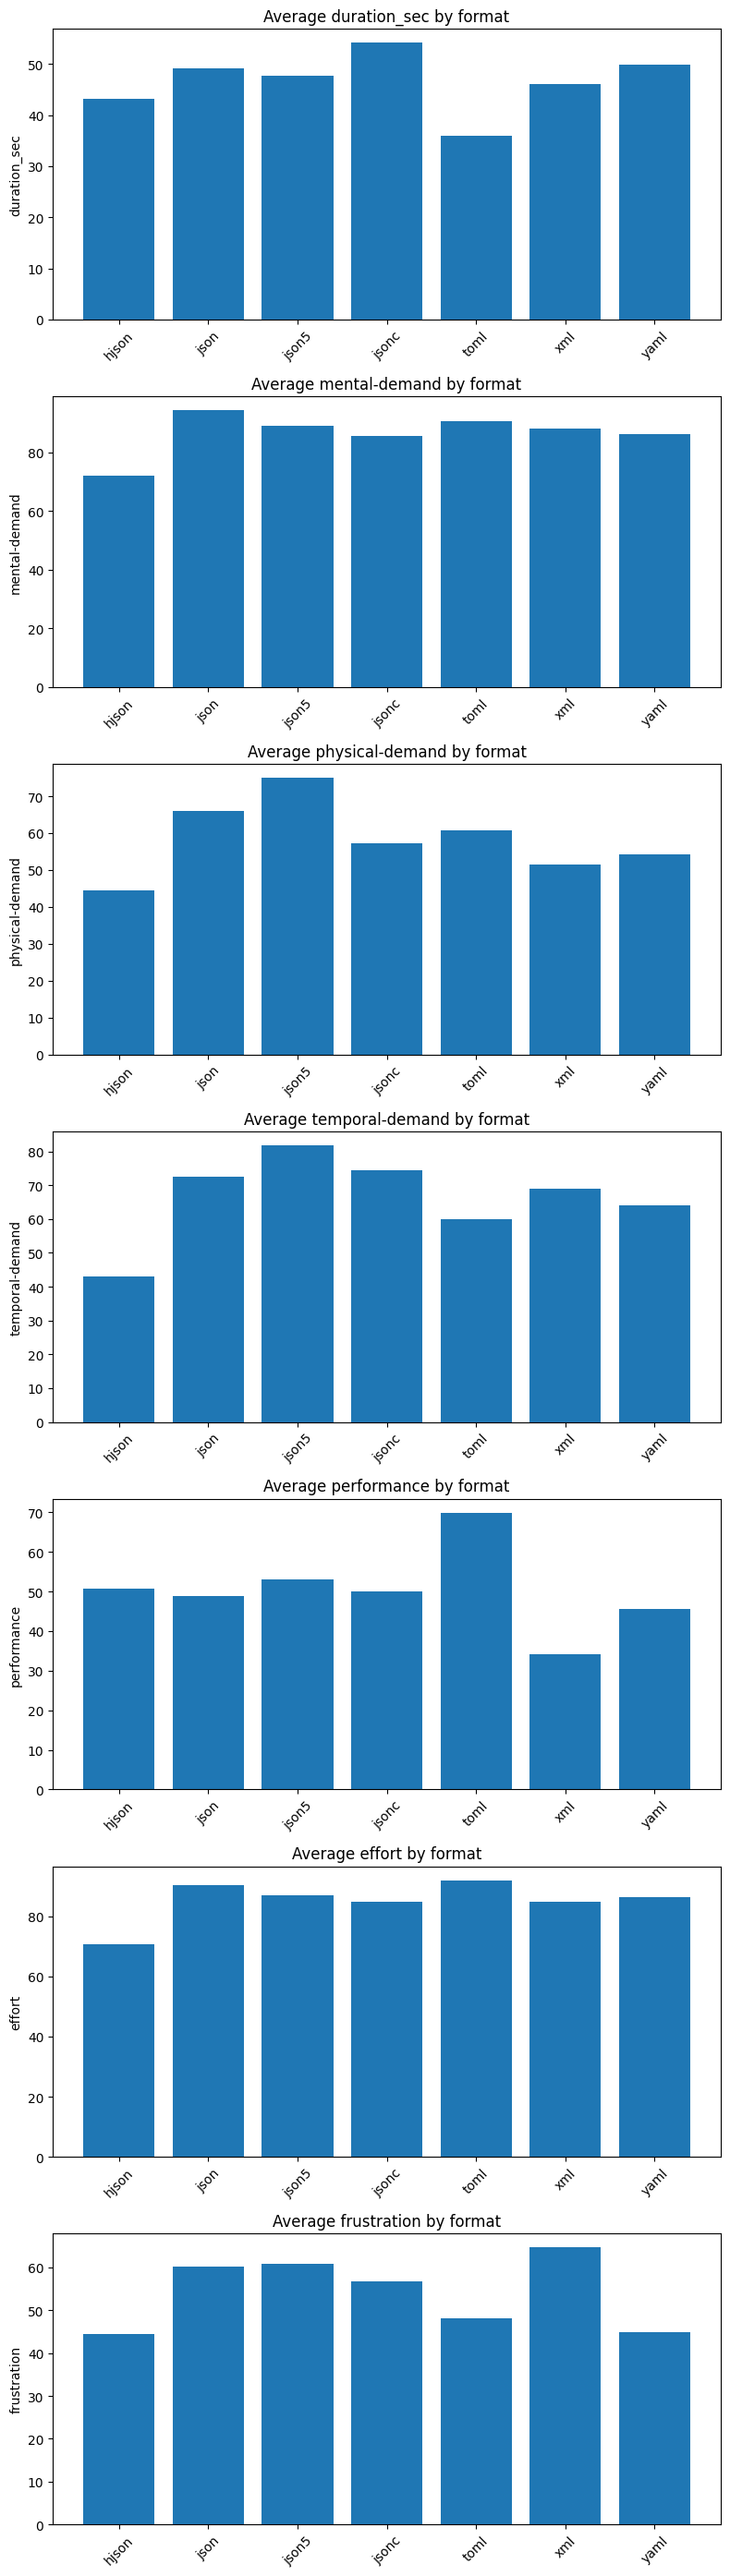

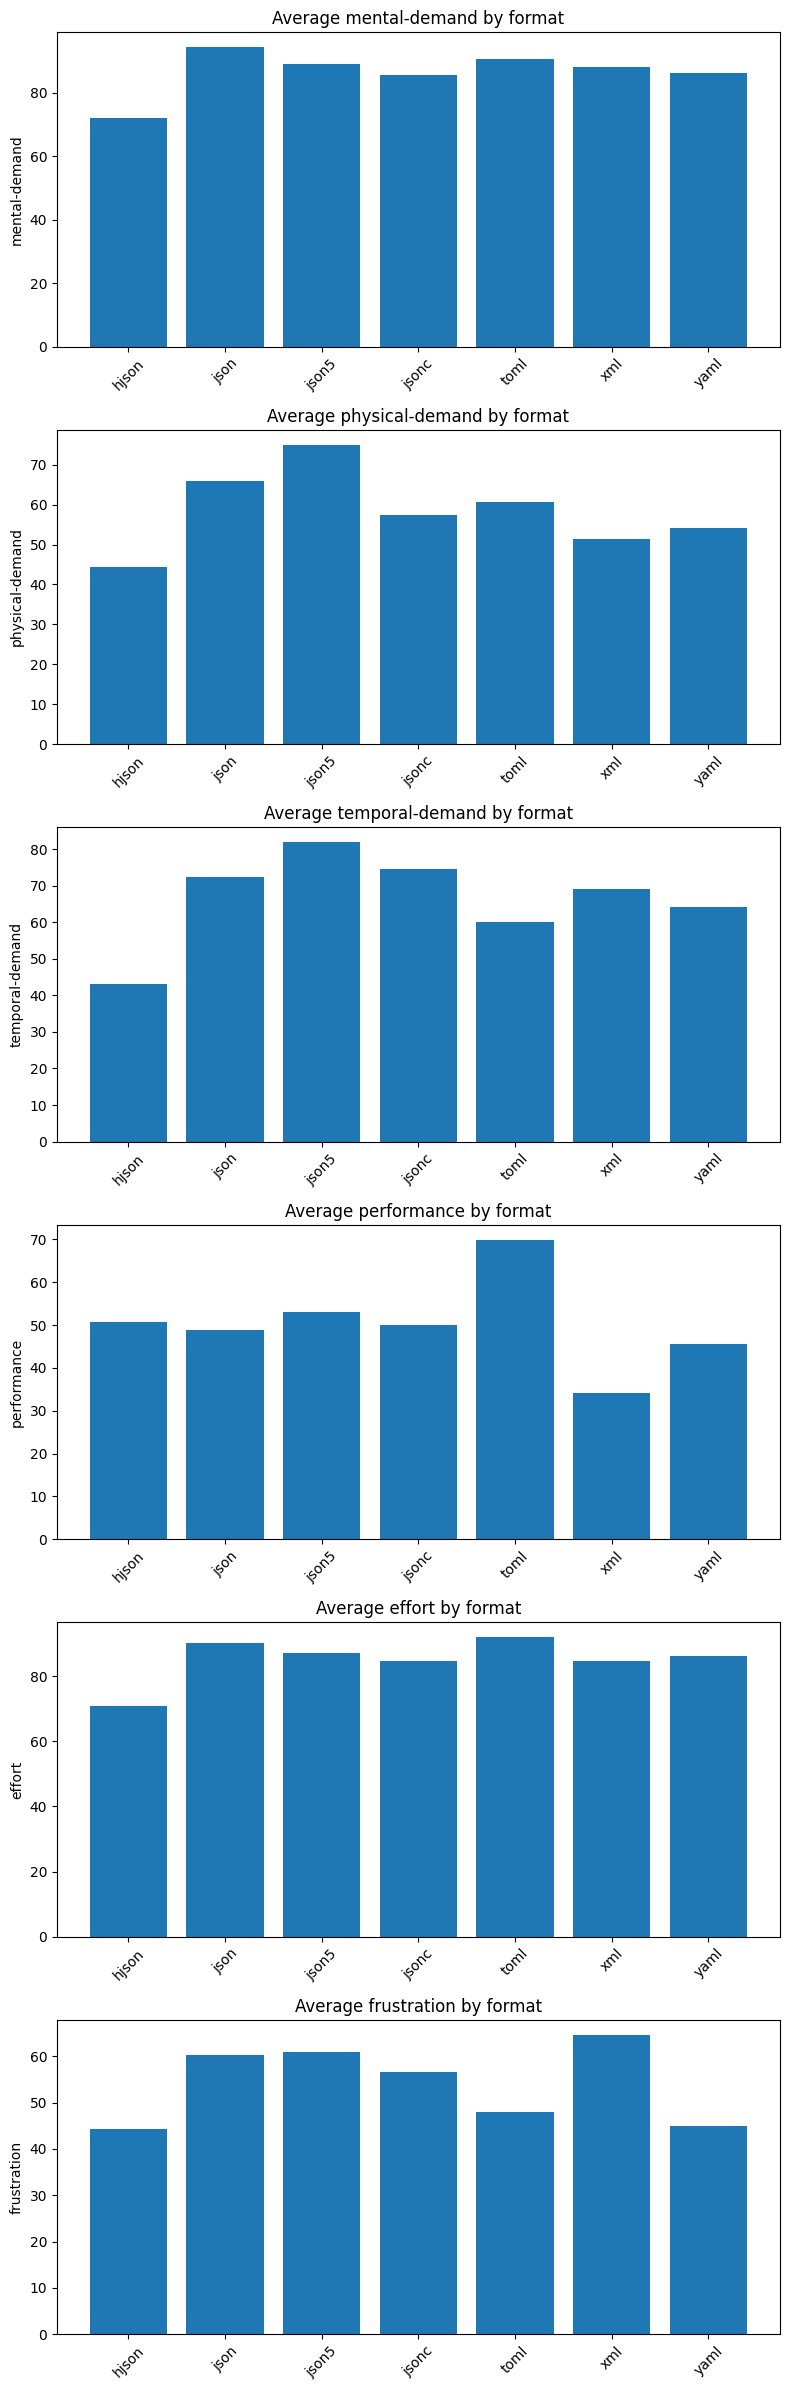

In [3]:
fig = plot_nasa_tlx_by_format(
    df_nasa,
    format_list=['json', 'xml', 'hjson', 'yaml','jsonc', 'json5', 'toml']
)
fig.show()

# 如果只想看时长和“努力（effort）”两个维度：
fig2 = plot_nasa_tlx_by_format(
    df_nasa,
    metrics = [
    'mental-demand',
    'physical-demand',
    'temporal-demand',
    'performance',
    'effort',
    'frustration'
]
)
fig2.show()


  format                      task  duration_sec  difficulty  confidence
0  hjson  modifying-task-tabular-1      6.687400    2.466667    5.933333
1  hjson  modifying-task-tabular-2      7.352933    2.066667    6.200000
2  hjson  modifying-task-tabular-3      5.550600    3.400000    4.733333
3  hjson  modifying-task-tabular-4      7.105933    4.266667    4.266667
4  hjson    reading-task-tabular-1      8.249200    1.733333    5.733333


/var/folders/hs/htjkkv116fv94g1llc3jj8jc0000gn/T/ipykernel_43141/1639020638.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


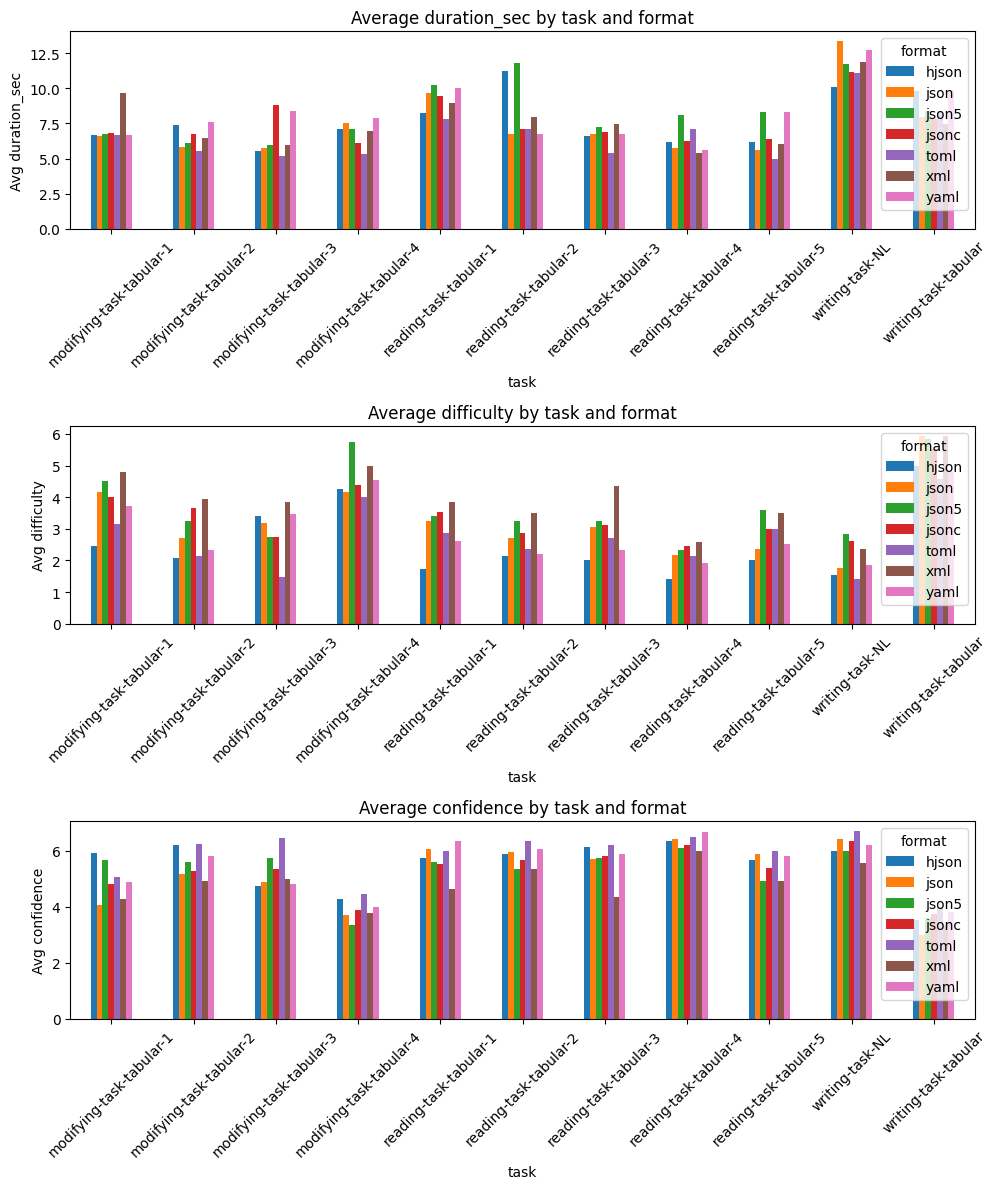

In [9]:
from quiz_evaluator import (
    extract_post_task_questions,
    plot_metrics_by_format_and_task,
    sanitize_task_names
)

df_post = extract_post_task_questions(all_data)

# 3. 查看 summary（可选）
df_clean = df_post.copy()
df_clean['task'] = sanitize_task_names(df_clean)['task']
summary = (
    df_clean
      .groupby(['format','task'])[['duration_sec','difficulty','confidence']]
      .mean()
      .reset_index()
)
print(summary.head())

# 4. 可视化：只看 json/xml/hjson 三种格式
fig = plot_metrics_by_format_and_task(
    df_post,
    format_list=['json', 'xml', 'hjson', 'yaml','jsonc', 'json5', 'toml'],
    metrics=['duration_sec','difficulty','confidence']
)
fig.show()


In [10]:
# 1. Aggregate tasks (keeping both original and grouped rows)
df_processed = process_clean_post_tasks(df_clean)

# 2. Test metrics across task groups
results = test_post_task_metrics(df_processed)


# 打印每个 task_group 下的解释
for tg, metrics_dict in results.items():
    print(f"\n=== Task Group: {tg} ===")
    for metric, info in metrics_dict.items():
        print(info['interpretation'])
        if info['tukey'] is not None:
            print(info['tukey'].summary())



=== Task Group: writing-task-NL ===
[writing-task-NL] Levene’s p = 0.916 (> 0.05), variances homogeneous. ANOVA p = 0.914 (≥ 0.05): no significant format differences on duration_sec.
[writing-task-NL] Levene’s p = 0.073 (> 0.05), variances homogeneous. ANOVA p = 0.089 (≥ 0.05): no significant format differences on difficulty.
[writing-task-NL] Levene’s p = 0.438 (> 0.05), variances homogeneous. ANOVA p = 0.495 (≥ 0.05): no significant format differences on confidence.

=== Task Group: reading-task-tabular-1 ===
[reading-task-tabular-1] Levene’s p = 0.656 (> 0.05), variances homogeneous. ANOVA p = 0.787 (≥ 0.05): no significant format differences on duration_sec.
[reading-task-tabular-1] Levene’s p = 0.043 (≤ 0.05), variances heterogeneous. Kruskal–Wallis p = 0.075 (≥ 0.05): no significant format differences on difficulty.
[reading-task-tabular-1] Levene’s p = 0.637 (> 0.05), variances homogeneous. ANOVA p = 0.136 (≥ 0.05): no significant format differences on confidence.

=== Task Gro

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



=== Categorical mappings (excluding q12) ===

q11:
  'Not familiar at all' → 0
  'Somewhat familiar' → 1
  'Very familiar' → 2

q13:
  'Dysgraphia (e.g., difficulty with handwriting or written expression).' → 0
  'Dyslexia (e.g., difficulty reading or distinguishing symbols, such as "b" and "d").' → 1
  'No, I do not have any cognitive-related conditions.' → 2
  'Prefer not to say.' → 3

q13-other:
  '' → 0

q14:
  'Color vision deficiency (CVD) (e.g., difficulty distinguishing colors like red and green).' → 0
  'No, I do not have any related conditions.' → 1
  'Prefer not to say.;No, I do not have any related conditions.' → 2

q14-other:
  '' → 0

q7:
  '' → 0
  "For someone in their 60's this was quite the confusing study, as I have seen these type of lines in movies but never worked with them before, it was an exciting study, dont get me wrong I enjoyed it, but some of those explanations flew right over my head hahaha.\nBut thank you for this, expanding my knowledge is still what I

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/hs/htjkkv116fv94g1llc3jj8jc0000gn/T/ipykernel_43141/4038870559.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figs['numeric'].show()
/var/folders/hs/htjkkv116fv94g1llc3jj8jc0000gn/T/ipykernel_43141/4038870559.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/hs/htjkkv116fv94g1llc3jj8jc0000gn/T/ipykernel_43141/4038870559.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figs['q12'].show()


Question: q11
Question: q13
Question: q13-other
Question: q14
Question: q14-other
Question: q7
Question: q8
Question: q9
Question: q9-other


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  func(*args, **kwargs)


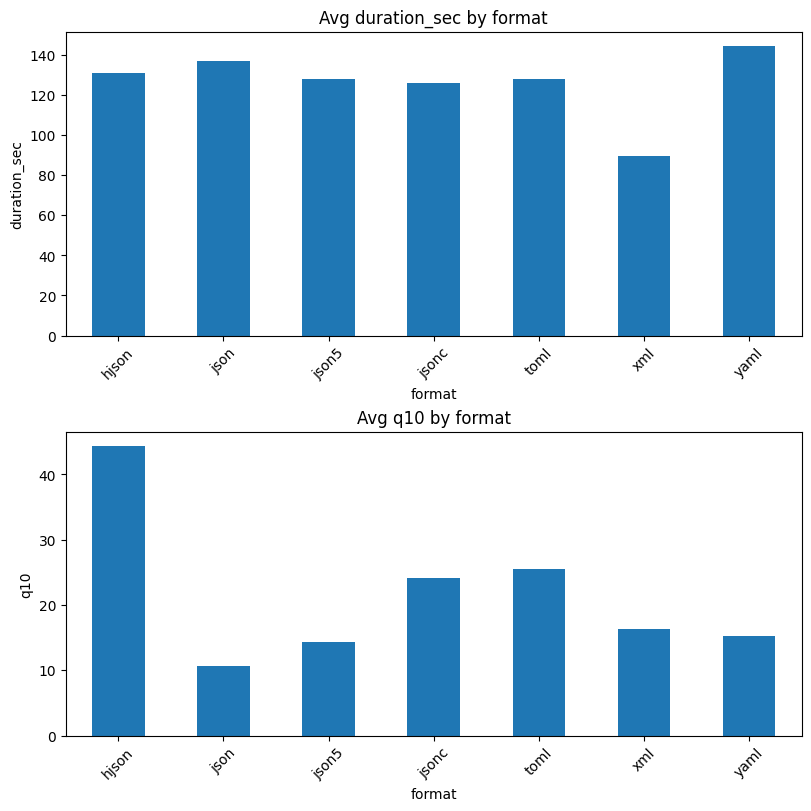

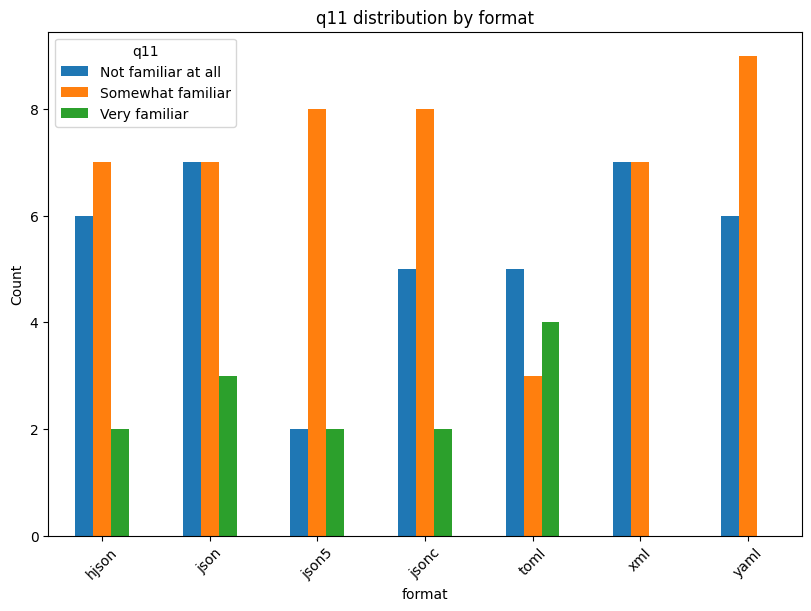

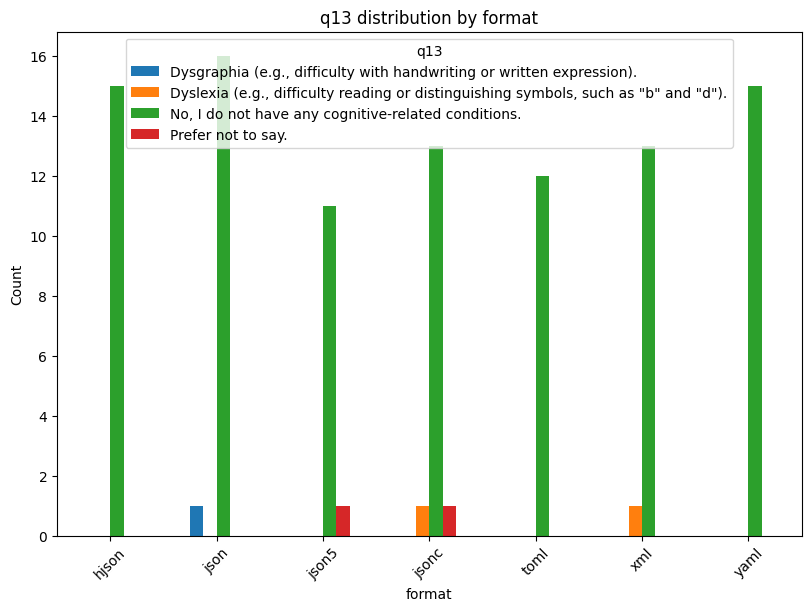

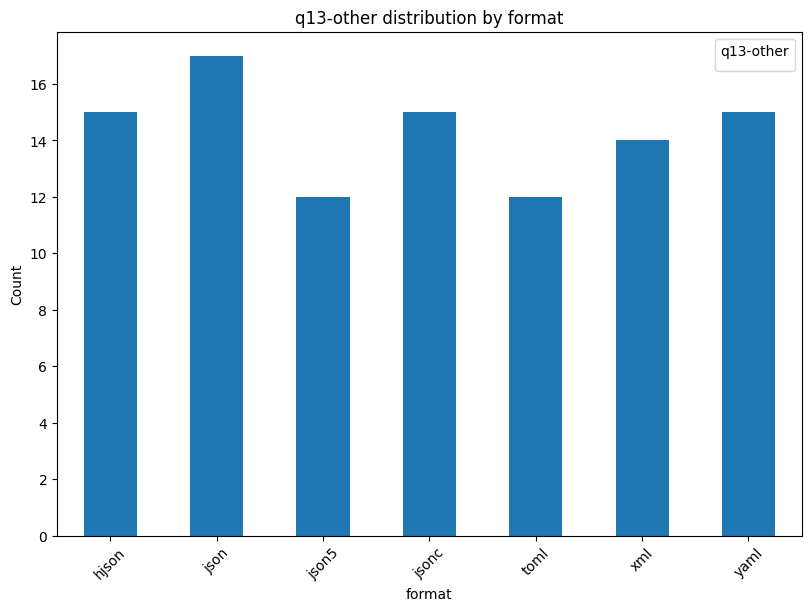

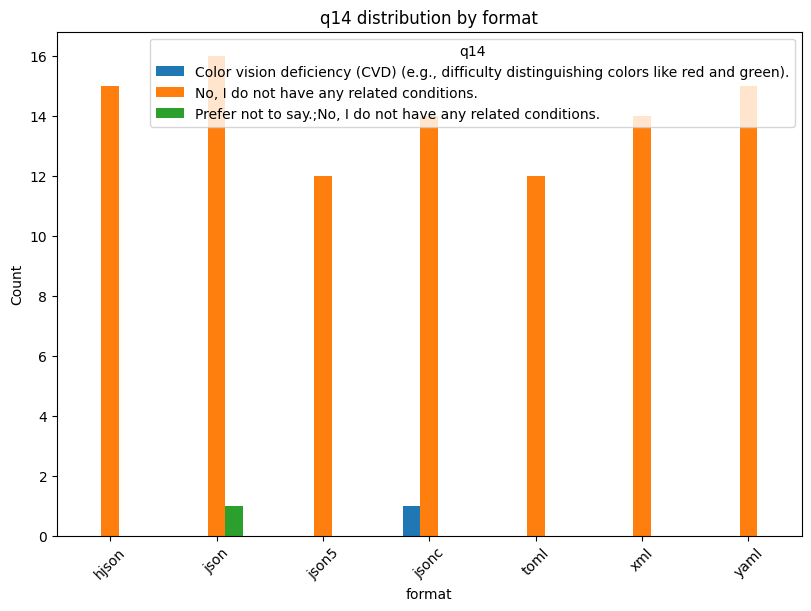

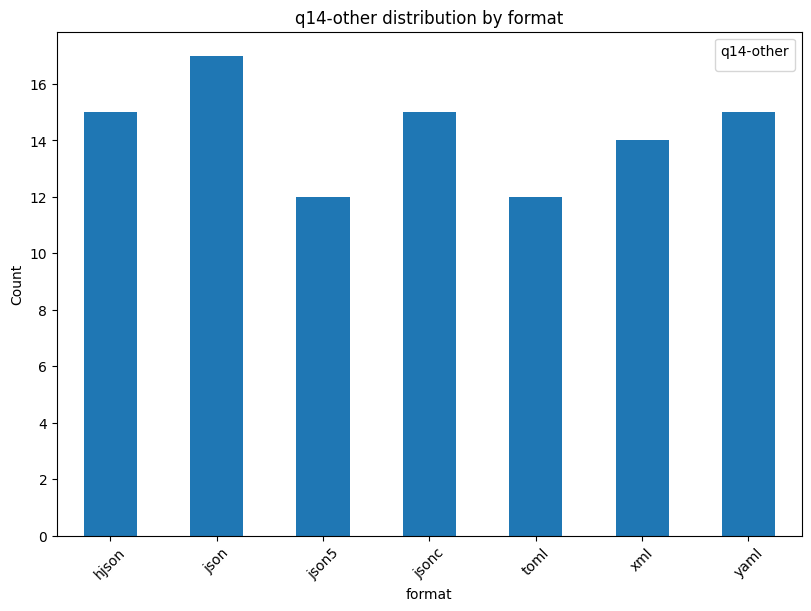

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


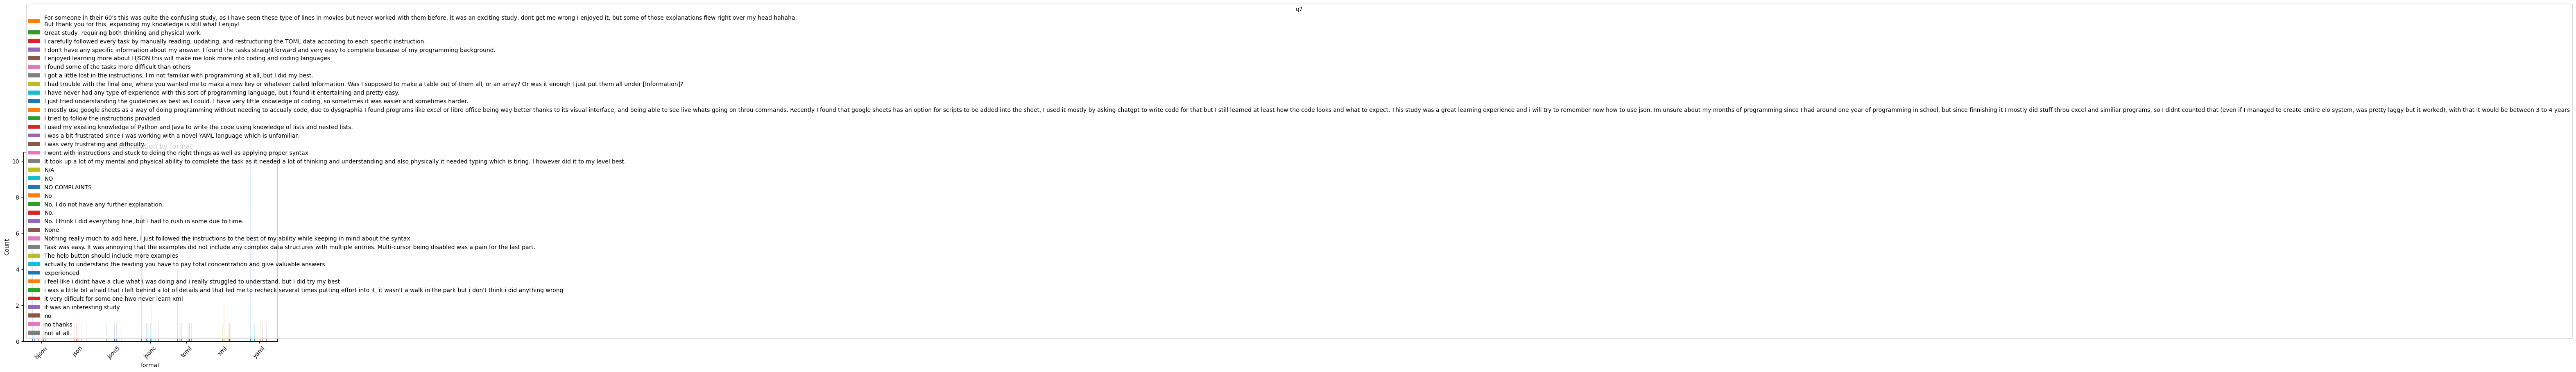

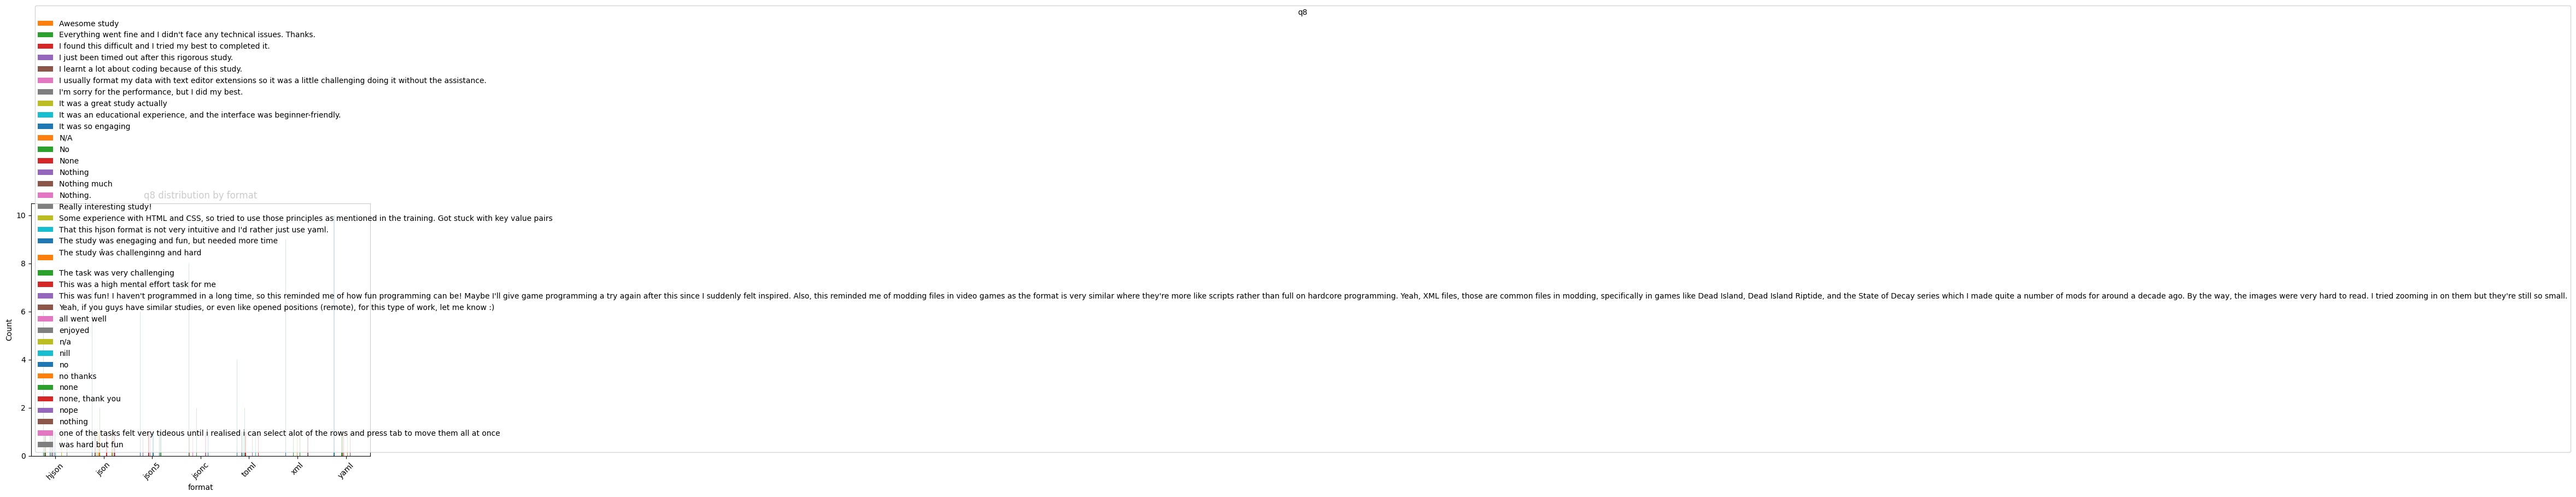

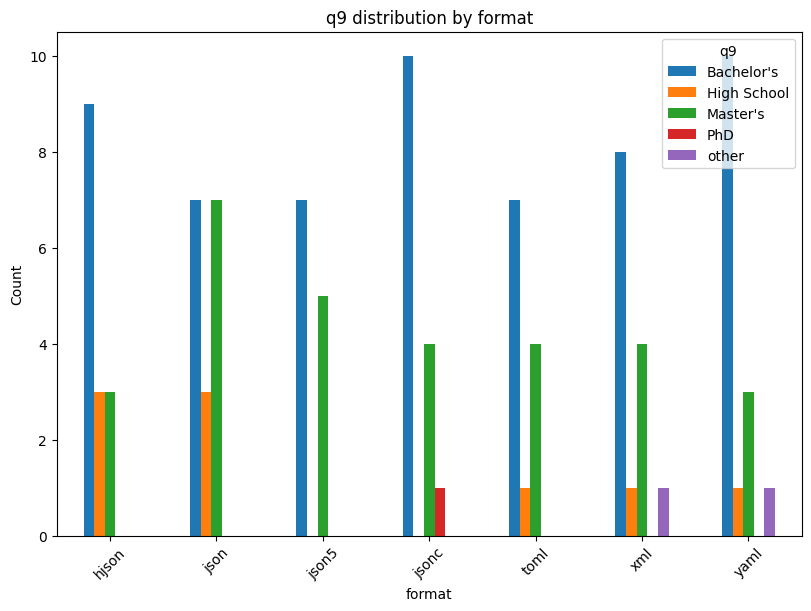

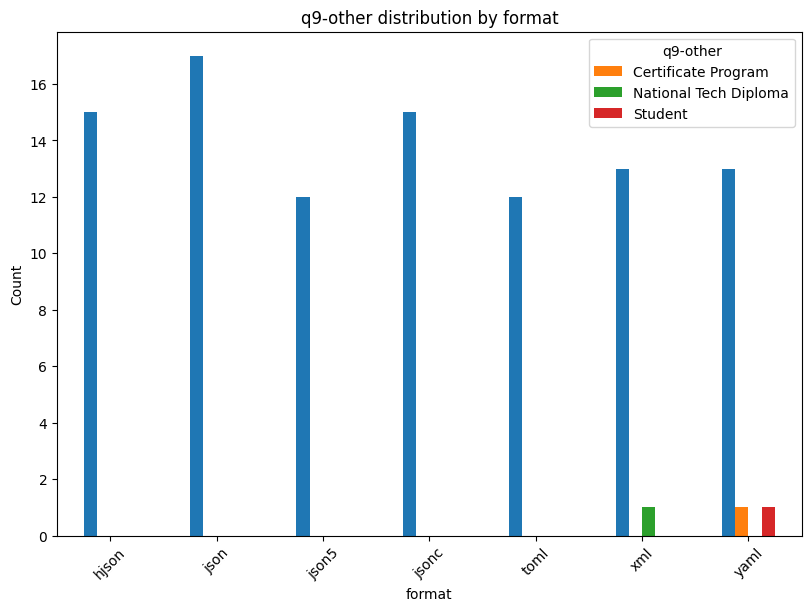

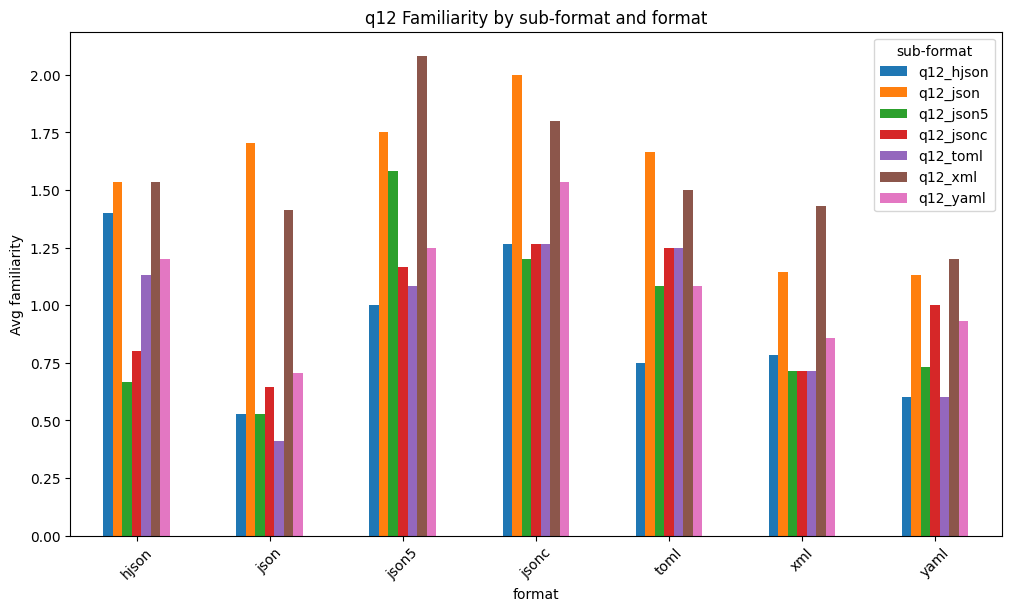

In [11]:
from quiz_evaluator import (
    extract_post_task_survey,
    plot_post_task_survey_by_format
)

# 1. 提取数据
df_survey = extract_post_task_survey(all_data)

# 2. 可视化并获取每个 Figure
figs = plot_post_task_survey_by_format(
    df_survey,
    format_list=['json', 'xml', 'hjson', 'yaml','jsonc', 'json5', 'toml']
)

# 3. 展示
figs['numeric'].show()
for q, fig in figs['categorical'].items():
    print("Question:", q)
    fig.show()
figs['q12'].show()

In [13]:
print(df_survey)

                participantId format                  task      startTime  \
0    6697c8b6d9d7baa7edd8c4d3  hjson  post-task-survey-tlx  1745933980597   
1    67e25388d573ec2d5f1c8442   yaml  post-task-survey-tlx  1746148206548   
2    67e5cf90b79d0874e1cf16b0   toml  post-task-survey-tlx  1746147510413   
3    67d00f24466a67ba7e41228e   toml  post-task-survey-tlx  1745933383518   
4    66475d6f7b27e4443ef0d031   json  post-task-survey-tlx  1744922093386   
..                        ...    ...                   ...            ...   
97   67ab650c320eccf6141d4010  jsonc  post-task-survey-tlx  1746147520202   
98   65fad673a546ab14baf2f8d3  json5  post-task-survey-tlx  1745932138030   
99   67f1c7bd6f1c4a3d8deae02f   toml  post-task-survey-tlx  1746146719288   
100  67adb27bd5f5776fcb16da62  hjson  post-task-survey-tlx  1746147560523   
101  6675c40cdc52b37294f0514e  hjson  post-task-survey-tlx  1746235958794   

           endTime  duration_sec  \
0    1745934152435       171.838   
1  